#  SP: Tonelada métrica per cápita de emisiones de CO2

## Carga de archivo

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 1.0 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%ls datasets/

adult.csv                                         coches.csv
airline_data.csv                                  cwurData.csv
antropometria00.csv                               data.csv
antropometria-dataset.csv                         headbrain.csv
API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114_3.csv    mic2.xlsx
API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv      mic.xlsx
API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884_2.xls  movies.csv
API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884.xls    nhanes_2015_2016.csv
Book3.csv                                         pokemon.csv
Canada.xlsx                                       sample_pivot.csv
Cartwheeldata.csv                                 tips.csv
census.csv                                        weight-height.csv
CO2emissions.xlsx


In [6]:
df=pd.read_excel('datasets/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884_2.xls',
                 sheet_name='Data',
                skiprows=range(3))

In [7]:
df.columns=list(map(str,df.columns))

In [8]:
all(isinstance(column,str)for column in df.columns)

True

In [9]:
df['Total']=df.iloc[:,5:].sum(axis=1)
df.head()
df.set_index('Country Name',inplace=True)

In [10]:
df.drop(['2019',    '2020'],
        inplace=True,
        axis=1
       )
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       'Total'],
      dtype='object')

In [11]:
años=list(map(str,range(1960,2019)))
años

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

## Introducción

Este conjunto de datos fue generado por el centro Carbon Dioxide Information Analysis Center de Tennessee en los Estados Unidos y fue extraido de la página de The World Bank.

Enlace a The World Bank para descargar: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?view=chart  

### Descripción de los datos

En este set de datos podemos encontrar las toneladas métricas de emisiones de CO2 (dioxido de carbono) de 236 países de los años 1960-2018.

La tabla tiene las siguientes columnas:


In [12]:
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       'Total'],
      dtype='object')

* 'Country Name' es un variable cualitativa, explica los países bajo estudio.
* 'Country Code' es un variable cualitativa, explica el codigo de los países bajo estudio.
* 'Region' es una variable cualitativa, explica la región de los países bajo estudio.
* 'Income Group' es una variable cualitativa, explica el grupo de ingresos de los países bajo estudio.
* 'Indicator Name' es un variable cualitativa, explica el tipo de indicador utilizado en el estudio.
* 'Indicator Code' es un variable cualitativa, explica el explica el codigo del indicador bajo estudio.
* '1960' - '2018' es una variable cuantitativa, explica las cantidad de toneladas metricas de emisiones de CO2 por cada país bajo estudio.
* 'Total' es una variavle cuantitativa, contiene la suma de toneladas metricas de emisiones de CO2 de cada país en los años 1960-2018.

### Tabla

In [13]:
df

,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,AFE,0,0,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,...,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,64.274924
Afghanistan,AFG,South Asia,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,...,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,8.813541
Africa Western and Central,AFW,0,0,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,...,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,26.000799
Angola,AGO,Sub-Saharan Africa,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,...,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,40.564875
Albania,ALB,Europe & Central Asia,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,...,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,97.965540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,East Asia & Pacific,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.135031,0.163542,0.158377,0.184037,0.208106,...,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588,40.887810
"Yemen, Rep.",YEM,Middle East & North Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,...,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682,26.085665
South Africa,ZAF,Sub-Saharan Africa,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,...,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645,442.350573


## Pregunta de Investigación 1: ¿Cuáles son los países que han emitido mas CO2 durante los años? ¿Cuáles son los que han emitido menos CO2?

Text(0, 0.5, 'Tonelada métrica de CO2')

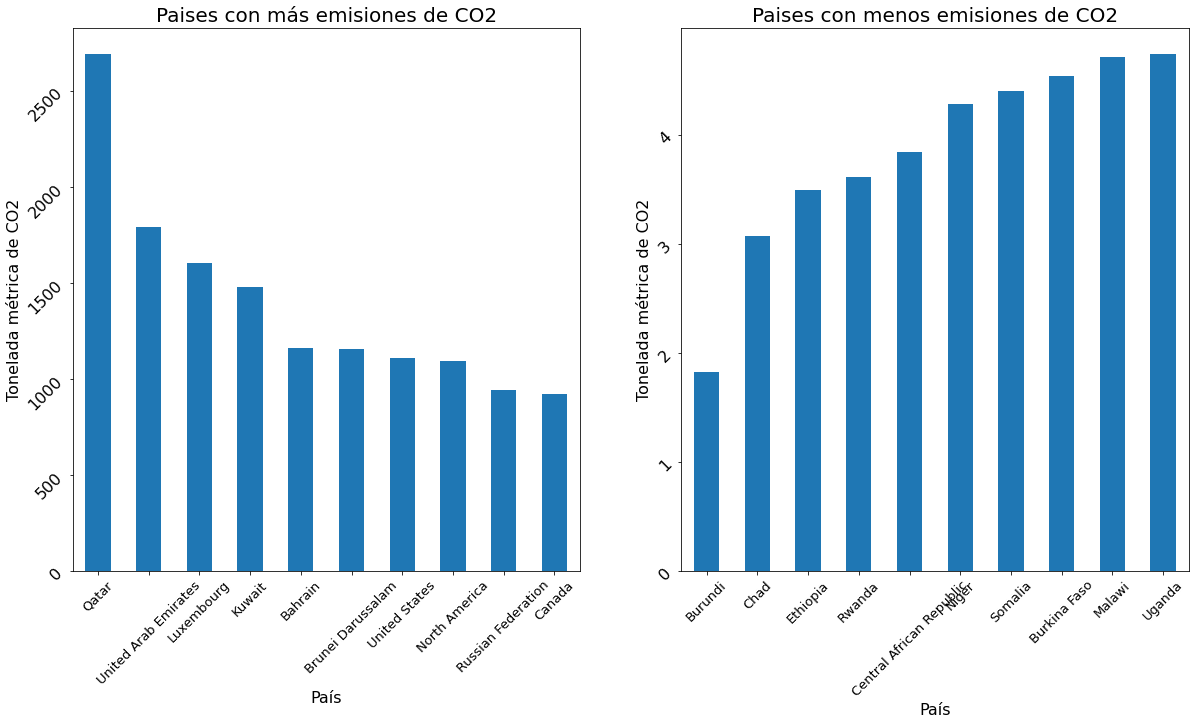

In [28]:
df_topten=df.sort_values(by='Total', 
                          ascending=False,
                          axis=0,
                         )
df_topten=df_topten.head(10)
df_topten=df_topten.loc[:,'Total']

df_bottten=df.sort_values(by='Total', 
                          ascending=True,
                          axis=0,
                         )
df_bottten=df_bottten.head(10)
df_bottten=df_bottten.loc[:,'Total']

fig=plt.figure()

ax1=fig.add_subplot(1,2,1) #1 renglon, 2 columnas, posicion 1
df_topten.plot(kind='bar')

plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Países con más emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)   

ax2=fig.add_subplot(1,2,2) #1 renglon, 2 columnas, posicion 2
df_bottten.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Países con menos emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

Text(0, 0.5, 'Tonelada métrica de CO2')

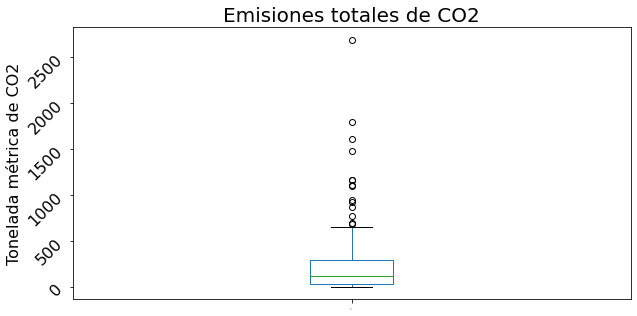

In [36]:
#sns.boxplot(data=df.loc[:,['Total']])
dftot=df.loc[:,'Total']
dftot.plot(kind='box',figsize=(10,5))
plt.xticks(fontsize=0,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones totales de CO2', fontsize=20)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* Según el diagrama de caja, los valores atípicos serían los países con un poco más de 500 toneladas metricas de emisiones de CO2, es decir, son valores extremadamente altos (aproximadamente 14 países).
* Muchos de los que se encuentran en los mayores lugares son del Middle East y América del Norte. Al igual, los que se enuentran en la gráfica de menores emisiones de CO2 son de Africa. ¿Habra una relación entre la región y las emisiones CO2?

## Pregunta de Investigación 2: ¿Hay alguna relación entre las emisiones de CO2  y la región?

Text(0, 0.5, 'Tonelada métrica de CO2')

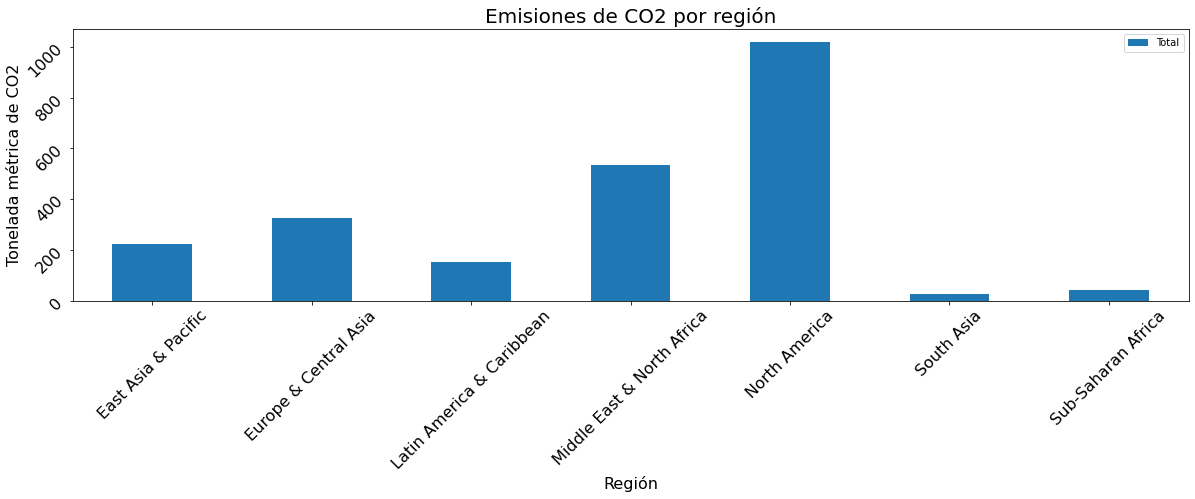

In [40]:
my_pivot=pd.pivot_table(df,
                        index='Region',
                        values='Total',
                       )
my_pivot=my_pivot.drop(0,axis=0)
my_pivot.plot(kind='bar',figsize=(20,5))
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 por región', fontsize=20)

plt.xlabel('Región', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* El estar en un tipo de región, tiene un impacto en la cantidad de emisiones de CO2.
* En esta gráfica podemos observar que las regiones con mayor emisiones de CO2 son "Middle East & North Africa" y "North America."
* La región con mejores emisiones de CO2 son de "South Asia" y "Sub-Saharan Africa."

## Pregunta de Investigación 3: ¿Desde que México ratificó el Acuerdo de París en el 2016, se ha visto un cambio en sus emisiones de CO2?

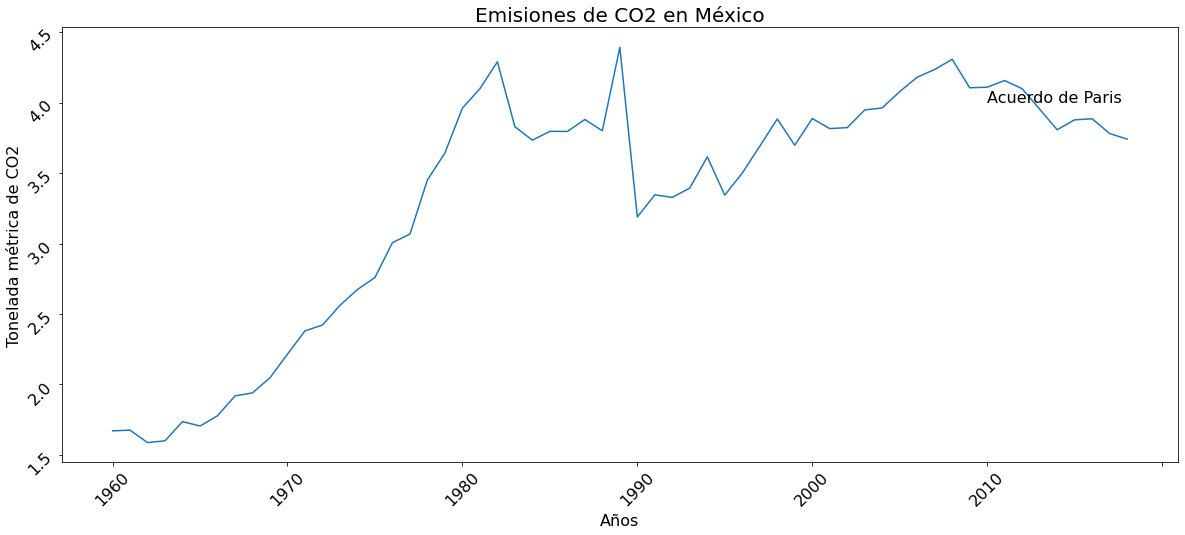

In [43]:
dfmex=df.loc['Mexico',años]

dfmex.plot(kind='line',figsize=(20,8))

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 en México', fontsize=20)

plt.xlabel('Años', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)
plt.text(50,4,'Acuerdo de Paris', fontsize=16)
plt.show()

### Conclusión

* México ha incremeentado sus emisiones de CO2 desde 1960.
* Desde el Acuerdo de París, México ha tenido una tendencia negativa en sus emisiones de CO2. 
* Sería interesante saber cómo afecto el cambio de gobierno de 2018, ¿las emisiones han incrementado o siguen bajando?

## Limitaciones

* No todos los países tienen datos en los años; hay algunos que tiene todos o la mayoría de los años vacios.
* Hay algunos países que no tienen resgitrado su región o tipo de ingreso.
* Desactualizada; sería interesante analizar los años 2019-2021.

## Siguientes pasos

* Encontrar una base de datos para complementar la información faltante de esta.
* Actividad 10 (hipotesis y predicción de modelos).